<a href="https://colab.research.google.com/github/caiogiffoni/salon-sql/blob/main/ex111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
cadFunc = pd.read_csv(r'/content/CadastroFuncionarios.csv', sep=';')
cadCli = pd.read_csv(r'/content/CadastroClientes.csv', sep=';')
sevPrest = pd.read_excel(r'/content/BaseServiçosPrestados.xlsx')

In [ ]:
display(cadFunc.info())
cadFunc['Impostos'] = [x.replace(',', '.') for x in cadFunc['Impostos']]
cadFunc['Beneficios'] = [x.replace(',', '.') for x in cadFunc['Beneficios']]
cadFunc['VR'] = [x.replace(',', '.') for x in cadFunc['VR']]
cadFunc= cadFunc.astype({"VR" :'float64', "VT" :'float64', "Impostos" :'float64', "Beneficios" :'float64'})
display(cadFunc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    float64
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


None

In [33]:
import locale
# cadFunc['Total'] = cadFunc['Salario Base'] + cadFunc['Impostos'] + cadFunc['Beneficios'] + cadFunc['VT'] + cadFunc['VR']
# display(cadFunc)
display(cadFunc['Total'].sum())
print(f'{sum(cadFunc["Total"])}')
print('R$ {:,.2f}'.format(sum(cadFunc["Total"])))

2717493.22

2717493.22
R$ 2,717,493.22


In [46]:
# display(cadCli)
# display(sevPrest)
# display(cadCli.merge(sevPrest, on='ID Cliente'))
serPresClien = cadCli.merge(sevPrest, on='ID Cliente')
# display(serPresClien)
serPresClien['Faturamento'] = serPresClien['Valor Contrato Mensal'] * serPresClien['Tempo Total de Contrato (Meses)']
display(serPresClien['Faturamento'].sum())
print('R$ {:,.2f}'.format(sum(serPresClien['Faturamento'])))

5519160

R$ 5,519,160.00


In [62]:
display(len(sevPrest['ID Funcionário'].unique())/len(cadFunc))
# display(sevPres.groupby('ID Funcionário').count())
qtdFunc = len(cadFunc)


0.868421052631579

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

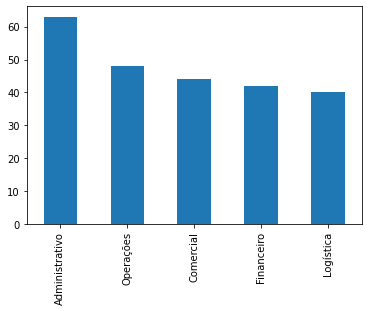

In [14]:
display(cadFunc.merge(sevPrest, on='ID Funcionário')['Area'].value_counts())
x = cadFunc.merge(sevPrest, on='ID Funcionário')['Area'].value_counts()
display(x)
x.plot(kind='bar')

In [10]:
display(sevPrest)
display(cadCli['Valor Contrato Mensal'].mean())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


2502.5625